### Logistic Regression

Why regression for classification? (sigmoid function) * Binary classification problem setup * Python: Logistic Regression (predict pass/fail, churn, etc.)

### Problem Setup

In Linear Regression, output is continuous (e.g., predicting house price).

But in classification, output is categorical (e.g., Pass/Fail, Yes/No, Spam/Not Spam).

If we try linear regression for classification:

Predictions may go below 0 or above 1 → not valid probabilities.

A simple threshold (say 0.5) may not separate well.

👉 We need a model that gives probabilities between 0 and 1.

Sigmoid Function (a.k.a. Logistic Function)

The Sigmoid maps any real number into (0,1):

6(z) = 1 / 1+e^-z

σ(z)>0.5 → Predict 1 (Positive)
If 
𝜎
(
𝑧
)
≤
0.5
σ(z)≤0.5 → Predict 0 (Negative

Another Analogy: Hiring Decision

Imagine an HR person deciding whether to hire a candidate.

Instead of saying "Yes/No" immediately, they think in terms of probability:

Resume is weak → 10% chance.

Average resume → 50% chance.

Excellent resume → 90% chance.

👉 Logistic regression behaves the same way: it gives a probability of belonging to a class, then you set the cut-off.

Study Hours: [3 5 7 9]
Predicted Probabilities: [[0.95096926 0.04903074]
 [0.64403166 0.35596834]
 [0.14439923 0.85560077]
 [0.01549914 0.98450086]]
Predicted Classes: [0 0 1 1]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


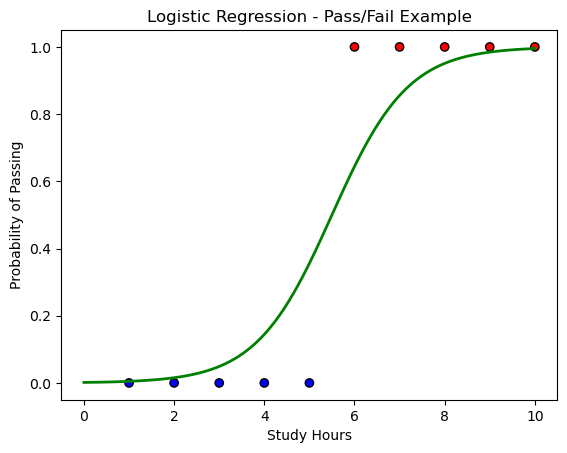

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Step 1: Create simple dataset
data = {
    "study_hours": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "pass_exam":   [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]   # 0 = Fail, 1 = Pass
}
df = pd.DataFrame(data)

X = df[["study_hours"]]   # Feature
y = df["pass_exam"]  # # Target

# Step 2: Train logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Step 3: Make predictions
hours = np.array([[3], [5], [7], [9]])
pred_probs = model.predict_proba(hours)  # probabilities
pred_classes = model.predict(hours)      # class labels

print("Study Hours:", hours.flatten())
print("Predicted Probabilities:", pred_probs)
print("Predicted Classes:", pred_classes)

# Step 4: Visualization
X_test = np.linspace(0, 10, 100).reshape(-1, 1)
y_prob = model.predict_proba(X_test)[:, 1]

plt.scatter(df["study_hours"], df["pass_exam"], c=df["pass_exam"], cmap="bwr", edgecolors="k")
plt.plot(X_test, y_prob, color="green", linewidth=2)
plt.xlabel("Study Hours")
plt.ylabel("Probability of Passing")
plt.title("Logistic Regression - Pass/Fail Example")
plt.show()

Accuracy: 0.7552447552447552

Confusion Matrix:
 [[68 19]
 [16 40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.80        87
           1       0.68      0.71      0.70        56

    accuracy                           0.76       143
   macro avg       0.74      0.75      0.75       143
weighted avg       0.76      0.76      0.76       143



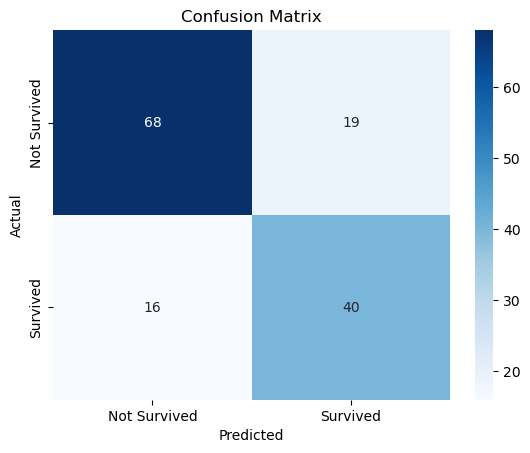

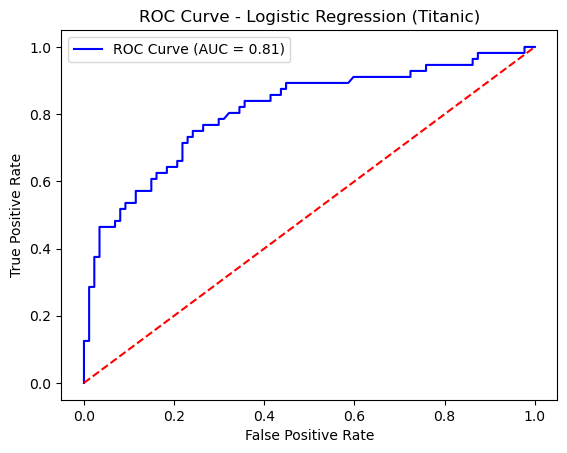

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

# --------------------------
# Step 1: Load dataset
# --------------------------
titanic = sns.load_dataset("titanic")
df = titanic[["survived", "pclass", "sex", "age", "fare"]].dropna()

# Convert categorical "sex" into numeric
df["sex"] = df["sex"].map({"male":0, "female":1})

X = df[["pclass", "sex", "age", "fare"]]
y = df["survived"]

# --------------------------
# Step 2: Train-test split
# --------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --------------------------
# Step 3: Train logistic regression model
# --------------------------
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# --------------------------
# Step 4: Predictions
# --------------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# --------------------------
# Step 5: Evaluation
# --------------------------
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --------------------------
# Step 6: Confusion Matrix Heatmap
# --------------------------
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# --------------------------
# Step 7: ROC Curve
# --------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0,1], [0,1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression (Titanic)")
plt.legend()
plt.show()
